### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help to repeat blood donations amongst donors based on a limited number of attributes



### About Dataset
Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD,"about 5 million Americans need a blood transfusion every year". Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus in March 2007

### Attribute Information:
    
* Unnamed: 0 : You can ignore this column
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation
* Made Donation in March 2007: a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood


In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#reading data
data=pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [6]:
#droping unnamed column
data.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
#renaming columns
data.rename({'Months since Last Donation':'Months_since_Last_Donation','Number of Donations':'No_of_Donations',
             'Total Volume Donated (c.c.)':'Total_volume','Months since First Donation':'Months_since_First_Donation',
             'Made Donation in March 2007':'Donation_March_2007'},inplace=True,axis=1)

In [8]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [9]:
#getting information of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months_since_Last_Donation   576 non-null    int64
 1   No_of_Donations              576 non-null    int64
 2   Total_volume                 576 non-null    int64
 3   Months_since_First_Donation  576 non-null    int64
 4   Donation_March_2007          576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


In [10]:
#getting statistical information of features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Months_since_Last_Donation,576.0,9.439236,8.175454,0.0,2.0,7.0,14.00,74.0
No_of_Donations,576.0,5.427083,5.740010,1.0,2.0,4.0,7.00,50.0
Total_volume,576.0,1356.770833,1435.002556,250.0,500.0,1000.0,1750.00,12500.0
Months_since_First_Donation,576.0,34.050347,24.227672,2.0,16.0,28.0,49.25,98.0
Donation_March_2007,576.0,0.239583,0.427200,0.0,0.0,0.0,0.00,1.0


### Exploratory Data Analysis

#### Univariant Analysis

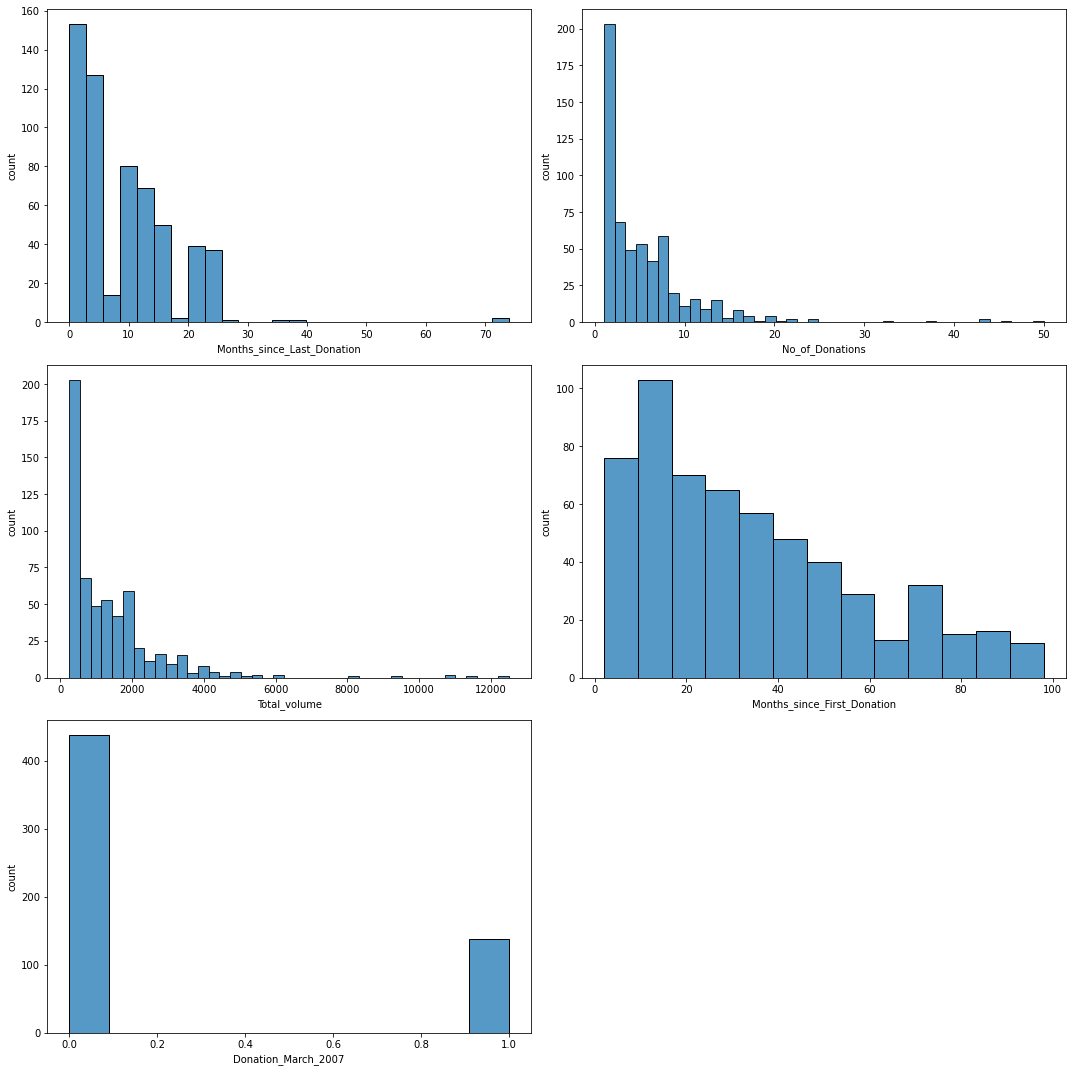

In [11]:
plt.figure(figsize=(15,15))
plotnumber=1
for features in data:
    if plotnumber<6:
        plt.subplot(3,2,plotnumber)
        sns.histplot(data[features])
        plt.xlabel(features)
        plt.ylabel('count') 
        plotnumber+=1
plt.tight_layout()    

In [8]:
#Automated EDA library
from pandas_profiling import ProfileReport
profile=ProfileReport(data, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Bivariant Analysis

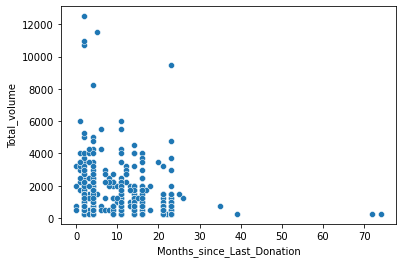

In [9]:
sns.scatterplot(data.Months_since_Last_Donation,data.Total_volume)
plt.show()

In [13]:
#there is no such relation between these feature

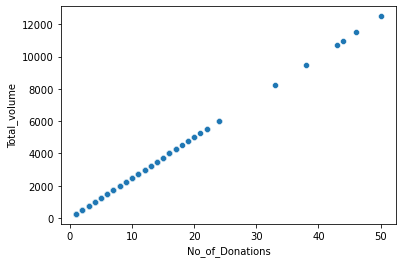

In [10]:
sns.scatterplot(data.No_of_Donations,data.Total_volume)
plt.show()

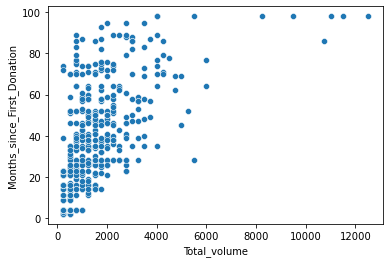

In [11]:
sns.scatterplot(data.Total_volume,data.Months_since_First_Donation)
plt.show()

<AxesSubplot:xlabel='Months_since_Last_Donation', ylabel='count'>

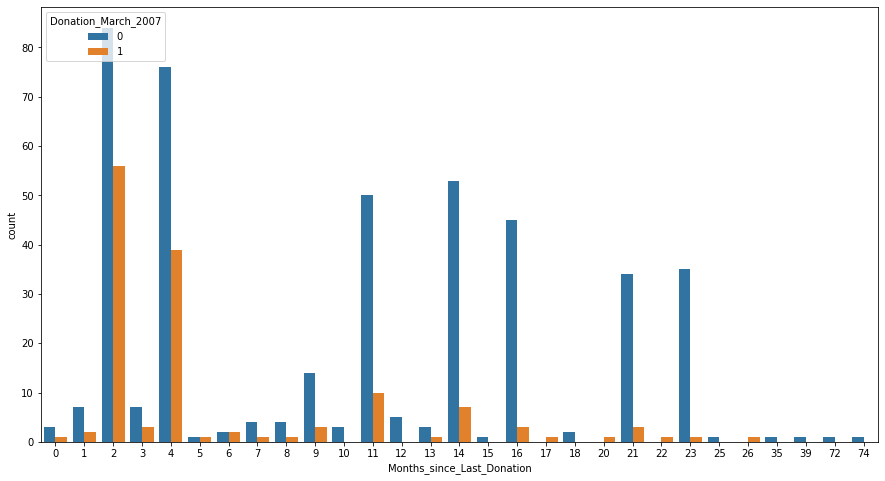

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(data.Months_since_Last_Donation,data=data,hue='Donation_March_2007')

<AxesSubplot:xlabel='Months_since_First_Donation', ylabel='count'>

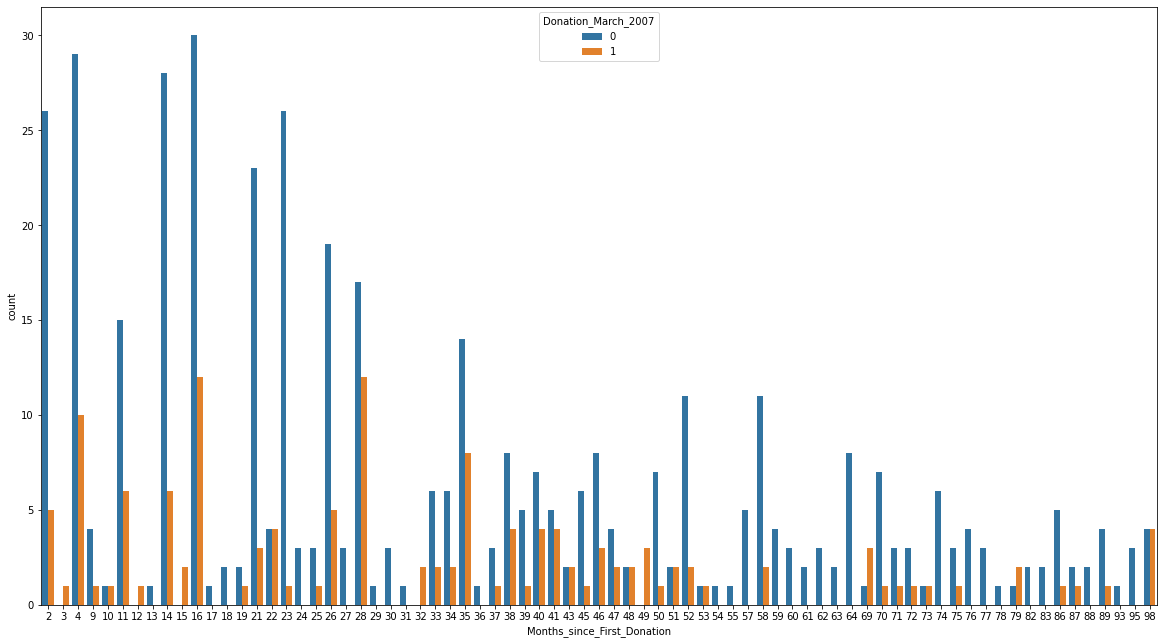

In [13]:
plt.figure(figsize=(20,11))
sns.countplot(data.Months_since_First_Donation,data=data,hue='Donation_March_2007')

<AxesSubplot:xlabel='No_of_Donations', ylabel='count'>

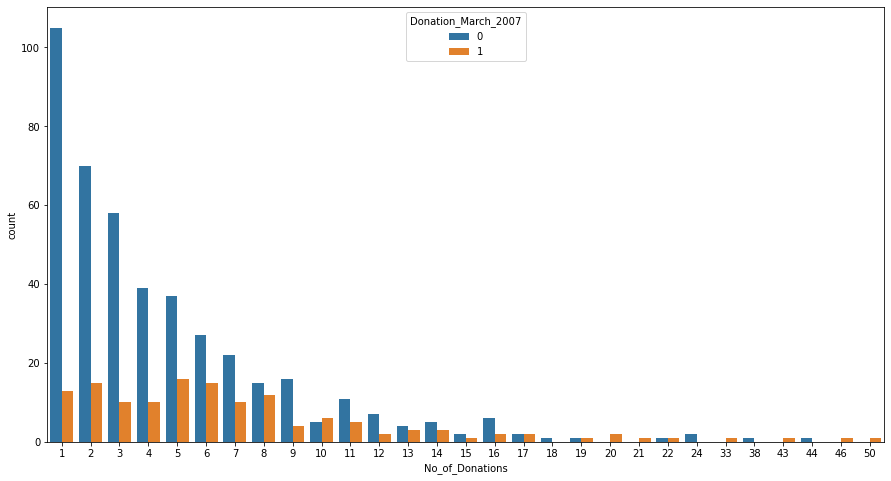

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data.No_of_Donations,data=data,hue='Donation_March_2007')

<AxesSubplot:xlabel='Total_volume', ylabel='count'>

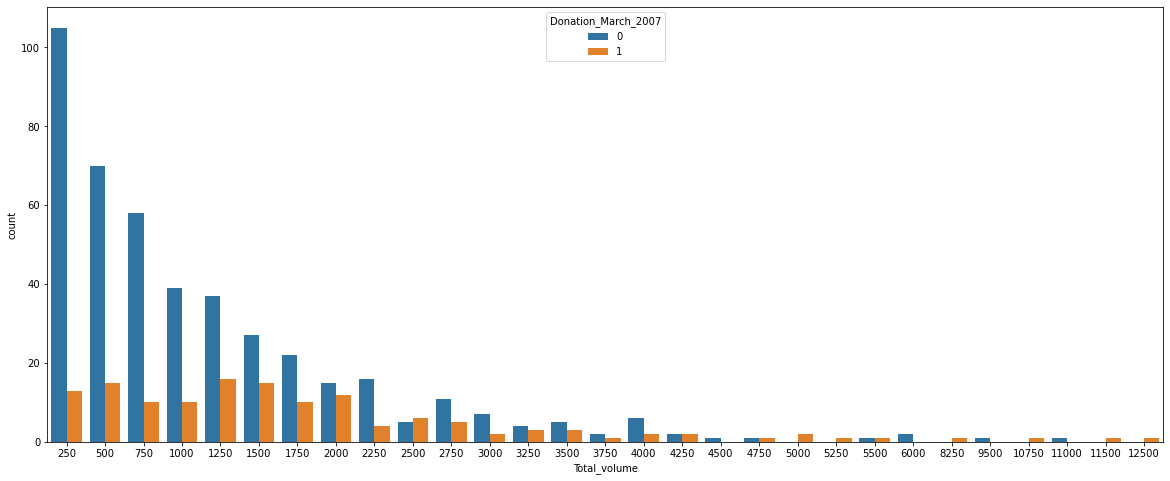

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(data.Total_volume,data=data,hue='Donation_March_2007')

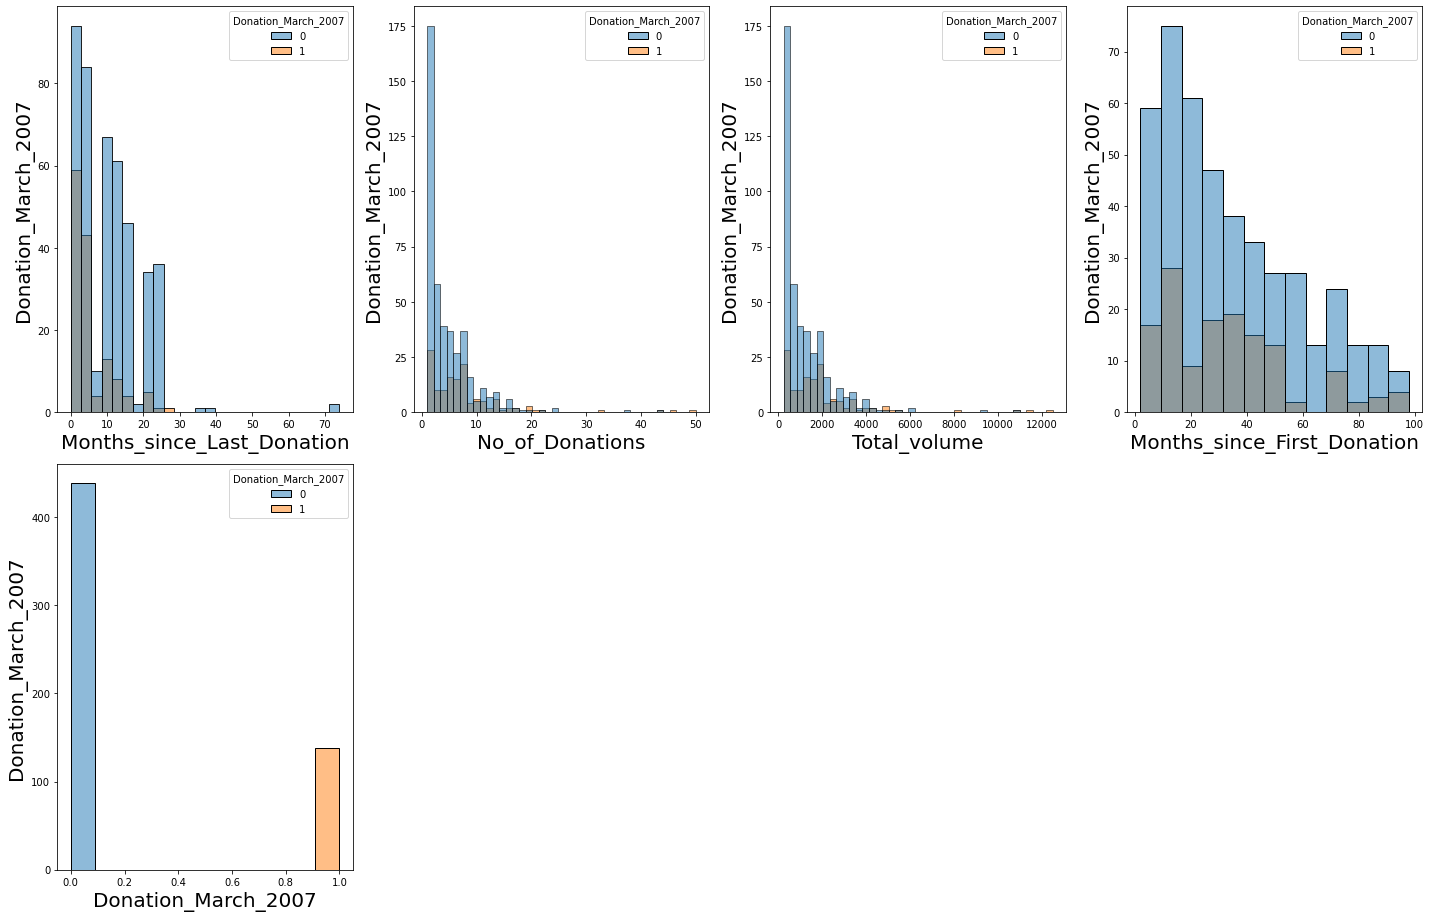

In [15]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=data.Donation_March_2007)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Donation_March_2007',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

In [20]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Data Pre-Processing

In [12]:
# checking null value
data.isnull().sum()

Months_since_Last_Donation     0
No_of_Donations                0
Total_volume                   0
Months_since_First_Donation    0
Donation_March_2007            0
dtype: int64

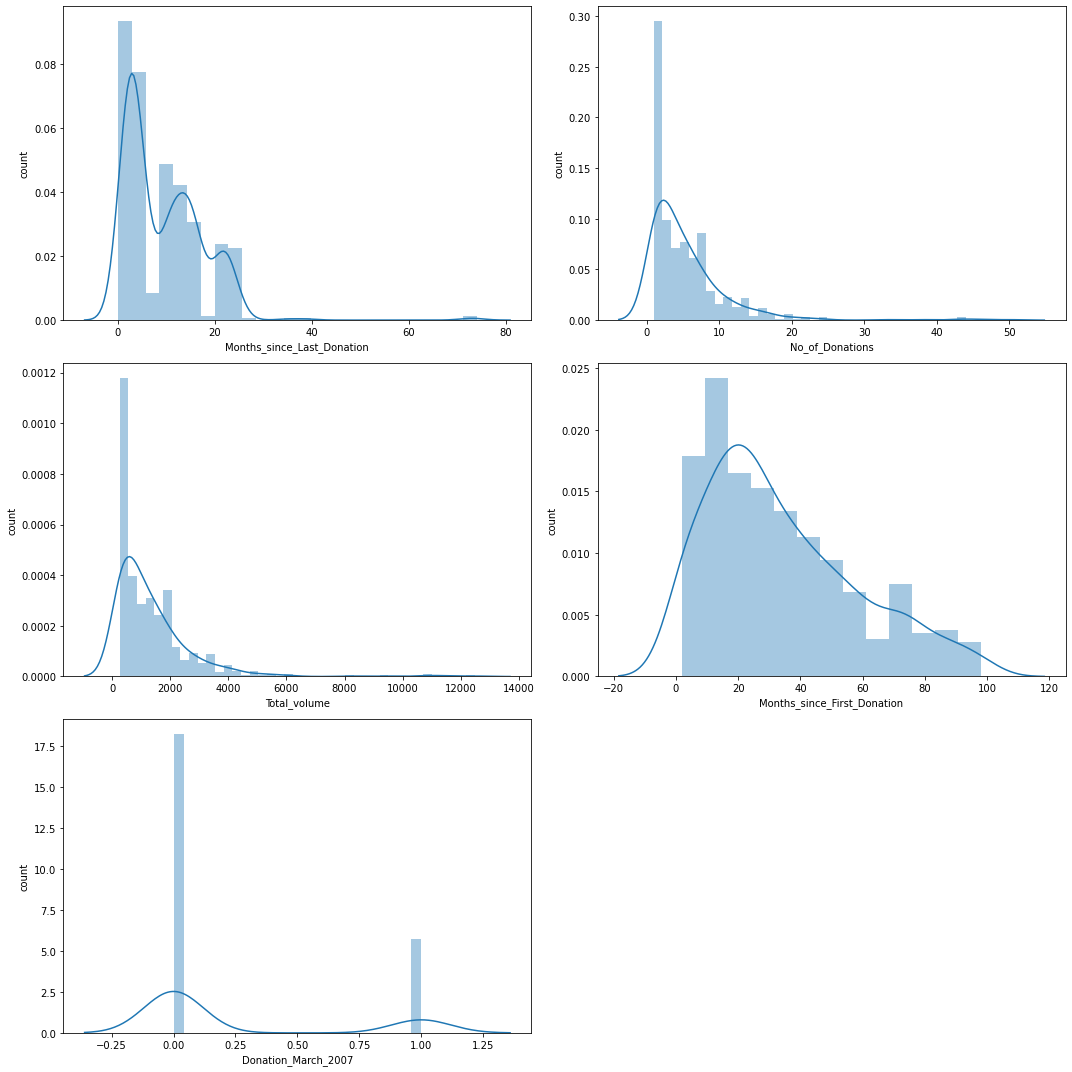

In [17]:
# checking distribution of features
plt.figure(figsize=(15,15))
plotnumber=1
for features in data:
    if plotnumber<6:
        plt.subplot(3,2,plotnumber)
        sns.distplot(data[features])
        plt.xlabel(features)
        plt.ylabel('count') 
        plotnumber+=1
plt.tight_layout()    

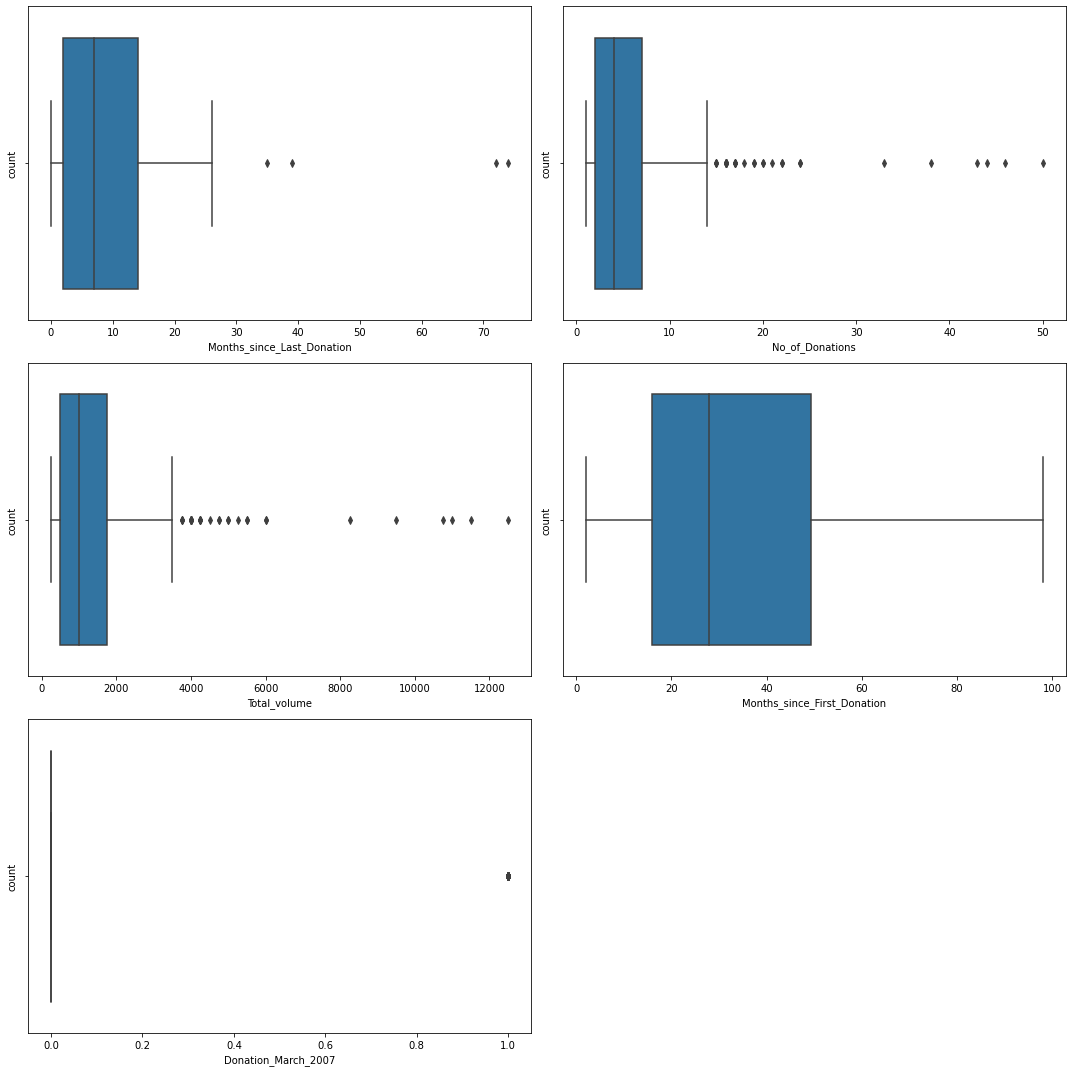

In [18]:
# checking outliers
plt.figure(figsize=(15,15))
plotnumber=1
for features in data:
    if plotnumber<6:
        plt.subplot(3,2,plotnumber)
        sns.boxplot(data[features])
        plt.xlabel(features)
        plt.ylabel('count') 
        plotnumber+=1
plt.tight_layout()    

In [13]:
from scipy import stats 
for column in data:
    skewness=stats.skew(data[column])
    kurtosis=stats.kurtosis(data[column])
    print(column,'skewness is',skewness)
    print(column,'kurtosis is',kurtosis)

Months_since_Last_Donation skewness is 2.0657096827922468
Months_since_Last_Donation kurtosis is 11.307425522378658
No_of_Donations skewness is 3.4942014134194905
No_of_Donations kurtosis is 18.76607929476726
Total_volume skewness is 3.494201413419492
Total_volume kurtosis is 18.76607929476727
Months_since_First_Donation skewness is 0.765705737811986
Months_since_First_Donation kurtosis is -0.20150153643843316
Donation_March_2007 skewness is 1.22023831140845
Donation_March_2007 kurtosis is -0.5110184633710539


In [14]:
#Months_since_Last_Donation,No_of_Donations & Total_volume features these features are not normally distributed hence\
# we will use IQR for removing outlier
from scipy import stats
#for duration (duration is non normal distribution so we used IQR for handling the outliers)
IQR = stats.iqr(data.Months_since_Last_Donation, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.Months_since_Last_Donation.quantile(0.25)#defining 25% of data
Q3=data.Months_since_Last_Donation.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['Months_since_Last_Donation']<min_limit])
display(data.loc[data['Months_since_Last_Donation']>max_limit])
# Size of dataset
display(data.shape[0]) 
# size of data which are outliers
display(len(data.loc[data['Months_since_Last_Donation'] > max_limit]))
# percentage of data outliers
display(4/576 *100)
# If outlier percentage is less than 5% then we will deal with the outliers.
data.loc[data['Months_since_Last_Donation']>max_limit,'Months_since_Last_Donation']=np.median(data.Months_since_Last_Donation)#imputing outlier with with median
data.loc[data['Months_since_Last_Donation']>max_limit] #checking whether outlier remove or not

'IQR is'

12.0

'min limit is'

-16.0

'max limit is'

32.0

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007


,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
384,35,3,750,64,0
385,74,1,250,74,0
574,39,1,250,39,0
575,72,1,250,72,0


576

4

0.6944444444444444

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007


In [15]:
#Months_since_Last_Donation,No_of_Donations & Total_volume features these features are not normally distributed hence\
# we will use IQR for removing outlier
from scipy import stats
#for duration (duration is non normal distribution so we used IQR for handling the outliers)
IQR = stats.iqr(data.No_of_Donations, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.No_of_Donations.quantile(0.25)#defining 25% of data
Q3=data.No_of_Donations.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['No_of_Donations']<min_limit])
display(data.loc[data['No_of_Donations']>max_limit])
# Size of dataset
display(data.shape[0]) 
# size of data which are outliers
display(len(data.loc[data['No_of_Donations'] > max_limit]))
# percentage of data outliers
display(31/576 *100)
# If outlier percentage is greater than 5% then no treatment.

'IQR is'

5.0

'min limit is'

-5.5

'max limit is'

14.5

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007


,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
8,5,46,11500,98,1
15,2,15,3750,49,1
28,2,16,4000,64,0
37,4,20,5000,69,1
47,4,19,4750,69,1
53,3,16,4000,74,0


576

31

5.381944444444445

In [16]:
#Months_since_Last_Donation,No_of_Donations & Total_volume features these features are not normally distributed hence\
# we will use IQR for removing outlier
from scipy import stats
#for duration (duration is non normal distribution so we used IQR for handling the outliers)
IQR = stats.iqr(data.Total_volume, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.Total_volume.quantile(0.25)#defining 25% of data
Q3=data.Total_volume.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['Total_volume']<min_limit])
display(data.loc[data['Total_volume']>max_limit])
# Size of dataset
display(data.shape[0]) 
# size of data which are outliers
display(len(data.loc[data['Total_volume'] > max_limit]))
# percentage of data outliers
display(31/576 *100)
# If outlier percentage is greater than 5% then no treatment.

'IQR is'

1250.0

'min limit is'

-1375.0

'max limit is'

3625.0

,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007


,Months_since_Last_Donation,No_of_Donations,Total_volume,Months_since_First_Donation,Donation_March_2007
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
8,5,46,11500,98,1
15,2,15,3750,49,1
28,2,16,4000,64,0
37,4,20,5000,69,1
47,4,19,4750,69,1
53,3,16,4000,74,0


576

31

5.381944444444445

## Feature Selection

<AxesSubplot:>

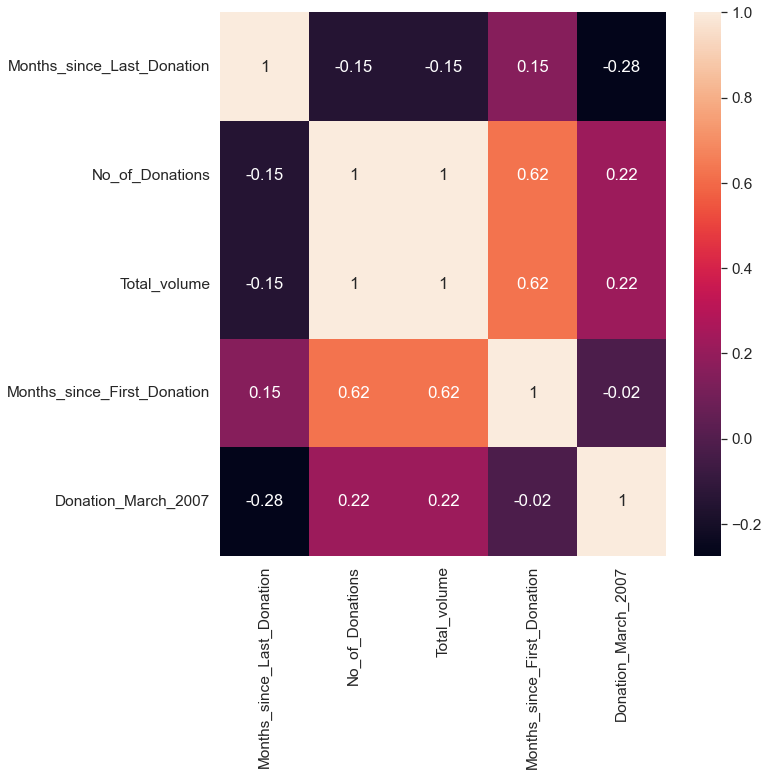

In [17]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [18]:
# droping Total_volume as it is highly corelated feature 
data.drop('Total_volume',axis=1,inplace=True)

In [19]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Months_since_First_Donation,Donation_March_2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [20]:
#checking duplicate rows
data.duplicated().sum()

153

In [21]:
#droping duplicate records
data.drop_duplicates(inplace=True)

In [22]:
#rechecking duplicate records
data.duplicated().sum()

0

In [23]:
#checking data type of all features
data.dtypes

Months_since_Last_Donation     int64
No_of_Donations                int64
Months_since_First_Donation    int64
Donation_March_2007            int64
dtype: object

In [24]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Months_since_First_Donation,Donation_March_2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [28]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
data[['Months_since_Last_Donation','No_of_Donations','Months_since_First_Donation']]=scalar.fit_transform(data[['Months_since_Last_Donation','No_of_Donations','Months_since_First_Donation']])

In [29]:
data.describe()

,Months_since_Last_Donation,No_of_Donations,Months_since_First_Donation,Donation_March_2007
count,4.230000e+02,4.230000e+02,4.230000e+02,423.000000
mean,1.598406e-16,2.041970e-16,-4.356904e-17,0.278960
std,1.001184e+00,1.001184e+00,1.001184e+00,0.449019
min,-1.321295e+00,-9.327804e-01,-1.687959e+00,0.000000
25%,-8.822470e-01,-6.064230e-01,-7.680129e-01,0.000000
50%,-1.505010e-01,-2.800656e-01,-1.475839e-01,0.000000
75%,7.275943e-01,2.094705e-01,7.081802e-01,1.000000
max,2.483785e+00,7.062976e+00,2.419709e+00,1.000000


### Model Creation

In [25]:
data.head()

,Months_since_Last_Donation,No_of_Donations,Months_since_First_Donation,Donation_March_2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [26]:
x=data.drop('Donation_March_2007',axis=1)
y=data.Donation_March_2007

In [27]:
## creating training and testing data
from sklearn.model_selection import train_test_split

## splitting the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [28]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({0: 305, 1: 118})
Counter({1: 305, 0: 305})


In [29]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_sm))

Actual Classes Counter({0: 305, 1: 118})
SMOTE Classes Counter({1: 305, 0: 305})


In [30]:
#### General
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


model_pipeline =[]
model_pipeline.append(LogisticRegression(solver="liblinear"))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

model_list = ["Logistic Regression","SVM","KNN","Decision Tree","Random Tree","Naive Bayes"]
acc_list=[]
auc_list=[]
cm_list=[]
pre_list=[]
Recall_list=[]
F1_score=[]
Classic_report=[]
  

for model in model_pipeline:
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr, _thresholds =metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    pre_list.append(precision_score(y_test,y_pred))
    Recall_list.append(recall_score(y_test,y_pred))
    F1_score.append(f1_score(y_test,y_pred))
    Classic_report.append(classification_report(y_test,y_pred))

In [32]:
result=pd.DataFrame({"Model":model_list, "Accuracy":acc_list,"AUC":auc_list,"Precision_score":pre_list,"recall_score":Recall_list,"f1_score":F1_score,"confusion_matrix":cm_list})
result

,Model,Accuracy,AUC,Precision_score,recall_score,f1_score,confusion_matrix
0,Logistic Regression,0.688679,0.56,0.421053,0.266667,0.326531,"[[65, 11], [22, 8]]"
1,SVM,0.716981,0.51,0.500000,0.033333,0.062500,"[[75, 1], [29, 1]]"
2,KNN,0.698113,0.59,0.454545,0.333333,0.384615,"[[64, 12], [20, 10]]"
3,Decision Tree,0.518868,0.42,0.181818,0.200000,0.190476,"[[49, 27], [24, 6]]"
4,Random Tree,0.688679,0.59,0.440000,0.366667,0.400000,"[[62, 14], [19, 11]]"
5,Naive Bayes,0.679245,0.52,0.357143,0.166667,0.227273,"[[67, 9], [25, 5]]"


In [33]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)#checking where probability of class 1 is  greater than threshold

In [34]:
## visualizing the roc plot
def roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

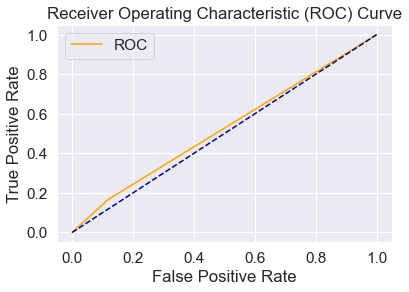

In [35]:
import matplotlib.pyplot as plt
roc_curve(fpr, tpr)#plotting ruc curve

### Hyperparameter Tuning

In [36]:
# train the model on train set
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model = SVC()
model.fit(x_train, y_train)
  
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83        76
           1       0.50      0.03      0.06        30

    accuracy                           0.72       106
   macro avg       0.61      0.51      0.45       106
weighted avg       0.66      0.72      0.62       106



In [37]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_sm, y_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.541 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.820 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.607 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.631 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.582 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [39]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        76
           1       0.80      0.93      0.86        30

    accuracy                           0.92       106
   macro avg       0.89      0.92      0.90       106
weighted avg       0.92      0.92      0.92       106



In [40]:
grid_predictions = grid.predict(x_train)
  
# print classification report
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       229
           1       0.83      0.97      0.89        88

    accuracy                           0.93       317
   macro avg       0.91      0.94      0.92       317
weighted avg       0.94      0.93      0.94       317



We are getting good accuracy of 92 % with SVC model. hence SVC is best model for this dataset.

In [41]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

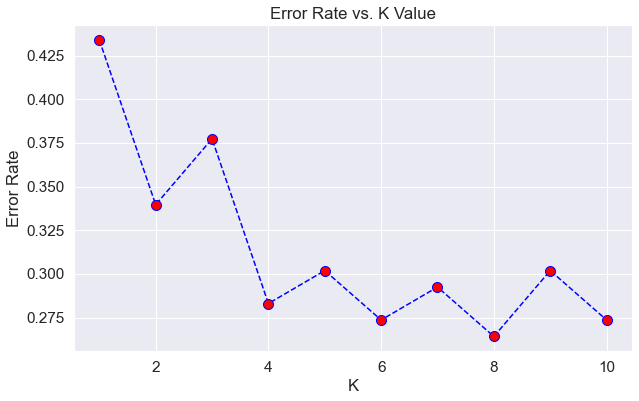

In [42]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)# Predict 
y_pred = knn.predict(x_test)

In [44]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7075471698113207


In [45]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [46]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


In [47]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


In [48]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [49]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf= 3,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [50]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)

In [51]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [52]:
y_hat2=dt1.predict(x_train)

In [53]:
accuracy_score(y_train,y_hat2) ## training accuracy

0.832807570977918

In [54]:
f1_score(y_train,y_hat2) 

0.6394557823129251

In [55]:
acc_test=accuracy_score(y_test,y_hat1)#testing accuracy
acc_test

0.6698113207547169

In [56]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        76
           1       0.40      0.33      0.36        30

    accuracy                           0.67       106
   macro avg       0.58      0.57      0.57       106
weighted avg       0.65      0.67      0.66       106



## Report
* We have trained our model with scaling and without scaling the data, & we have observed that the model is performing well without scaling. 
* After training with different model we have compared the accuracy of model, and we got good accuracy in SVM.
* We have also performed Hyperparameter tuning on SVM and got accuracy arround 85 % .
* We have also performed hyperparameter tuning for DecisionTree, but our model is overfitted.